# Ejercicios del tema de Regresión

*Hugo Díaz Díaz*(*hdiazdd00@estudiantes.unileon.es*)

*Correo profesional: hugo.didi.contacto@gmail.com*

---

<br>

<blockquote style="border-left: 4px solid #00ccff; padding: 0.5em;">
  <strong>💡 NOTA PARA EL PROFESORADO</strong> <br><br> <b>La entrega se realiza en un Jupyter Notebook ajeno al de los apuntes, primero por temas de ejecución y montar mis propios flujos de datos desde cero y segundo por llevar un seguimiento y publicar mis ejercicios en Github, al que prefiero subir contenido exclusivamente propio. Espero que no sea una molestia y si así lo fuera lo cambiaré para la próxima entrega.<br><br> Gracias.</b>
</blockquote>

<br>


## Preguntas opcionales:

### 1. ¿Qué algoritmo de entrenamiento de regresión lineal puede utilizar si dispone de un conjunto de entrenamiento con millones de características?

---

Con millones de características, entrenaría con alguna variante de Gradient Descent (SGD o Mini-Batch). La Ecuación Normal y la SVD se vuelven muy lentas cuando n crece mucho, mientras que GD escala bien con el número de características.

### 2. Suponga que las características de su conjunto de entrenamiento tienen escalas muy diferentes. ¿Qué algoritmos podrían verse afectados por esta situación? ¿Qué puede hacerse al respecto?

---

Si las variables están en escalas muy distintas, los algoritmos basados en Gradient Descent se ven afectados (convergencia muy lenta o inestable). La solución es escalar/estandarizar las características antes de entrenar (p. ej. con StandardScaler).

### 3. ¿Puede Gradient Descent quedarse atascado en un mínimo local al entrenar un modelo de Regresión Logística?

---

En regresión logística (modelo lineal) la función de pérdida (log-loss/entropía cruzada) es convexa respecto a los parámetros, por lo que no existen mínimos locales: cualquier mínimo es global. Por eso GD no suele “atascarse” en mínimos locales; además, la naturaleza estocástica de SGD ayuda a escapar de óptimos “malos” si los hubiera.

### 4. ¿Todos los algoritmos Gradient Descent conducen al mismo modelo si se les deja correr el tiempo suficiente?

---

Tras suficiente entrenamiento, los métodos de GD acaban en modelos muy similares. Batch GD se detiene en el mínimo; SGD y Mini-Batch se acercan y “oscilan” alrededor, pero con un buen schedule de learning rate también pueden asentarse.

### 5. Supongamos que utilizas Batch Gradient Descent y representas gráficamente el error de validación en cada epoch. Si observas que el error de validación aumenta constantemente, ¿qué puede estar pasando? ¿Cómo puede solucionarlo?

---

Si el error de validación sube en cada epoch con Batch GD, puede que estés sobreajustando o, más típicamente, que la tasa de aprendizaje sea demasiado alta y el entrenamiento esté divergendo. Solución: reduce η y/o aplica regularización o parada temprana para cortar cuando el error de validación deje de mejorar.


### 6. ¿Es una buena idea detener el Mini-Batch Gradient Descent inmediatamente cuando el error de validación aumenta?

---

No conviene parar Mini-Batch GD en cuanto sube una vez el error de validación: las curvas son ruidosas. Lo sensato es usar parada temprana con “paciencia” (esperar al mínimo claro) o suavizar la métrica; entonces cortar en el mínimo de validación.

### 7. ¿Qué algoritmo Gradient Descent (de entre los que hemos discutido) alcanzará más rápidamente la proximidad de la solución óptima? ¿Cuál convergerá realmente? ¿Cómo puedes hacer que los demás también converjan?

---

El que llega antes “cerca” del óptimo suele ser SGD (o Mini-Batch) porque cada actualización es barata. El que realmente converge y se queda en el mínimo es Batch GD; a los otros puedes hacerlos converger usando un schedule que reduzca gradualmente el learning rate.

### 8. Supongamos que se utiliza la regresión polinómica. Se trazan las curvas de aprendizaje y se observa que hay una gran diferencia entre el error de entrenamiento y el error de validación. ¿Qué ocurre? ¿Cuáles son las tres formas de resolverlo?

---

Si con regresión polinómica ves gran brecha entre error de entrenamiento (bajo) y de validación (alto), hay sobreajuste. Tres vías: reducir la complejidad (grado menor), añadir más datos de entrenamiento y/o regularizar (Ridge/Lasso/Elastic Net).

### 9. Supongamos que se utiliza la regresión Ridge y se observa que el error de entrenamiento y el error de validación son casi iguales y bastante elevados. ¿Diría que el modelo tiene un sesgo alto o una varianza alta? ¿Debería aumentar el hiperparámetro de regularización α o reducirlo?

---

Si en Ridge train y valid son casi iguales y altos, hay alto sesgo (underfitting). Para darle más capacidad, reduciría α (demasiada regularización aplana el modelo).

### 10. ¿Por qué querría utilizar...
- Regresión Ridge en lugar de Regresión Lineal simple (es decir, sin ninguna regularización)?
- Lasso en lugar de Ridge Regression?
- Elastic Net en lugar de Lasso?

---

Usaría Ridge en lugar de lineal “pura” para controlar el sobreajuste manteniendo pesos pequeños; Lasso en lugar de Ridge cuando prefiero penalización $l_1$; y Elastic Net cuando quiero un compromiso ajustable entre $l_1$ y $l_2$ (r mezcla ambos extremos).


### 11. Supongamos que se desea clasificar las imágenes como exteriores/interiores y diurnas/nocturnas. ¿Debería implementar dos clasificadores de Regresión Logística o un clasificador de Regresión Softmax?

---


Aquí son dos etiquetas independientes (exterior/interior y diurna/nocturna). Implementaría dos clasificadores logísticos binarios, no un Softmax, que está pensado para clases mutuamente excluyentes en un único eje multiclase. 

## Ejercicio obligatorio:

### 12. **(OBLIGATORIO)** Implementa Batch Gradient Descent con parada temprana para la Regresión Softmax (sin usar Scikit-Learn).

#### 12.0. Consideraciones iniciales.

Este ejercicio nos pide combinar tres conceptos clave del tema de regresión:

- Regresión Softmax: modelo de clasificación multiclase basado en **regresión logística**.
- Batch Gradient Descent: algoritmo de **optimización** que actualiza los parámetros usando todo el conjunto de datos en cada iteración.
- Parada temprana: técnica de **regularización** que detiene el entrenamiento cuando el error de validación alcanza su mínimo.

No podemos usar Scikit-Learn, así que lo implementaremos con `numpy`, siguiendo las fórmulas del tema. Usaré el dataset iris para probar el modelo.

Para ello, seguiré los siguientes pasos:
1. Carga y preparación de datos.
2. Implementar la función Softmax y la pérdida de entropía cruzada.
3. Implementar el Batch Gradient Descent con parada temprana.
4. Entrenamiento del modelo.
5. Evaluación del modelo aprendido.

Vamos a hacer un setup rápido importando las librerías necesarias y configurando los plots tal como se hace en el cuaderno del tema.

In [76]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# ELIMINAMOS SCIKIT-LEARN
# Scikit-Learn ≥0.20 is required 
# import sklearn
# assert sklearn.__version__ >= "0.20"

# Common imports (añadimos pandas para gestionar datos)
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

# Añado un data path
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### 12.1. Carga y preparación de datos.

Voy a cargar Iris desde un CSV.

In [77]:
df = pd.read_csv(os.path.join(DATA_PATH, "iris.csv"))

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Separamos conjunto de entrenamiento y conjunto de validación (80/20), posteriormente características y etiquetas.

In [78]:
try:
    df = df.drop("Id", axis=1) # Elimino columna Id
except:
    pass

df_train = df.sample(frac=0.8, random_state=42) # 80% para train
df_val = df.drop(df_train.index) # 20% para validación

X_train = df_train.drop("Species", axis=1).values 
y_train = df_train["Species"].values

X_val = df_val.drop("Species", axis=1).values
y_val = df_val["Species"].values

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((120, 4), (120,), (30, 4), (30,))

Recordemos que este dataset tiene 3 clases de flores (setosa, versicolor, virginica). Guardamos las etiquetas como enteros 0, 1, 2 para más adelante hacer One-Hot Encoding.

In [79]:
classes, y_train = np.unique(y_train, return_inverse=True)

_, y_val = np.unique(y_val, return_inverse=True)

classes, y_train, y_val

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
        0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
        1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0,
        0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,
        1, 2, 1, 2, 0, 2, 1, 2, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2]))

Realizamos estandarización de características, ya que, como se ha visto en el tema, el escalado acelera y estabiliza la convergencia de GD. Y usar solo estadísticas de entrenamiento evita fugas de datos.

In [80]:
mu = X_train.mean(axis=0, keepdims=True) # keepdims para mantener dimensiones
sigma = X_train.std(axis=0, keepdims=True)

X_train = (X_train - mu) / (sigma + 1e-12)  # Añadimos epsilon para evitar división por cero
X_val = (X_val - mu) / (sigma + 1e-12)

Ahora sí, utilizamos One-Hot Encoding para las etiquetas.

In [81]:
def one_hot(y: np.ndarray, K: int) -> np.ndarray:
    """
    One-hot encodes the integer labels.
    Args:
        y: A numpy array of shape (N,) containing integer labels.
        K: An integer representing the number of classes.
    Returns:
        A numpy array of shape (N, K) containing one-hot encoded labels.
    """
    Y = np.zeros((y.shape[0], K))
    Y[np.arange(y.shape[0]), y] = 1
    return Y

K = len(np.unique(y_train))

Y_train = one_hot(y_train, K)
Y_val = one_hot(y_val, K)

y_train[0:5], Y_train[0:5], y_val[0:5], Y_val[0:5]

(array([1, 0, 2, 1, 1]),
 array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.]]),
 array([0, 0, 0, 0, 0]),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]))

#### 12.2. Función Softmax y pérdida de entropía cruzada.

Empecemos implementando la función Softmax tal como en los apuntes.

$$
\text{Puntuación por clase} \rightarrow s_k(x) = (\theta^{(k)})^T x \\
\space\\
\text{Probabilidades} \rightarrow p_k(x) = \frac{exp(s_k(x))}{\sum_{j=1}^{K} exp(s_j(x))}
$$

In [82]:
def softmax(logits: np.ndarray) -> np.ndarray:
    """
    Computes the softmax of the input logits.
    Args:
        logits: A numpy array of shape (N, K) containing the input logits.
    Returns:
        A numpy array of shape (N, K) containing the softmax probabilities.
    """
    s_k = logits - np.max(logits, axis=1, keepdims=True) # Substract max for numerical stability
    exp_s_k = np.exp(s_k)
    return exp_s_k / np.sum(exp_s_k, axis=1, keepdims=True) 

Ahora implementamos la pérdida de entropía cruzada para múltiples clases:

In [83]:
def cross_entropy(Y_true: np.ndarray, Y_pred: np.ndarray) -> float:
    """
    Computes the cross-entropy loss.
    Args:
        Y_true: A numpy array of shape (N, K) containing the true one-hot encoded labels.
        Y_pred: A numpy array of shape (N, K) containing the predicted probabilities.
    Returns:
        A float representing the cross-entropy loss.
    """
    N = Y_true.shape[0]
    log_probs = -np.log(Y_pred + 1e-12)  # Añadimos epsilon para evitar log(0)
    loss = np.sum(Y_true * log_probs) / N
    return loss

Y añadimos un medidor de accuracy para evaluar el modelo:

In [84]:
def accuracy(Y_true: np.ndarray, Y_pred: np.ndarray) -> float:
    """
    Computes the accuracy of predictions.
    Args:
        Y_true: A numpy array of shape (N, K) containing the true one-hot encoded labels.
        Y_pred: A numpy array of shape (N, K) containing the predicted probabilities.
    Returns:
        A float representing the accuracy.
    """
    y_true_labels = np.argmax(Y_true, axis=1)
    y_pred_labels = np.argmax(Y_pred, axis=1)
    acc = np.mean(y_true_labels == y_pred_labels)
    return acc

#### 12.3. Implementación de Batch Gradient Descent con parada temprana.

Implementamos la función de entrenamiento completa con **Batch Gradient Descent** y parada temprana.

La función sigue estos pasos:

1. **Inicialización:** Los parámetros del modelo (pesos `W` y sesgos `b`) se inicializan con valores pequeños aleatorios para evitar saturar la función Softmax. También se preparan variables para almacenar los mejores parámetros y el historial de métricas.

2. **Bucle de entrenamiento:** En cada época se realiza el forward pass calculando las probabilidades con Softmax, se computa la pérdida de entropía cruzada, se calculan los gradientes y se actualizan los parámetros con Gradient Descent.

3. **Parada temprana:** Se monitorea la pérdida de validación. Si en alguna época la pérdida de validación, se espera un número de épocas (paciencia) y si no mejora, el entrenamiento se detiene inmediatamente y se devuelven los mejores parámetros encontrados hasta ese momento.

In [85]:
def train_bgd(
    X_train: np.ndarray, Y_train : np.ndarray,
    X_val: np.ndarray, Y_val : np.ndarray,
    lr: float = 0.1, n_epochs: int = 1000, patience: int = 10, seed: int = 42
):
    # 1. Inicialización de parámetros
    np.random.seed(seed)
    n = X_train.shape[1]  # Número de características
    W = 0.01 * np.random.randn(n, K)  # Pesos inicializados aleatoriamente
    b = np.zeros((1, K))  # Bias inicializado a cero
    best_W, best_b = W.copy(), b.copy() # Para guardar los mejores parámetros
    best_val_loss = np.inf  # Mejor pérdida de validación
    wait = 0 # Contador para paciencia
    
    history = {'train_loss': [],
               'val_loss': [],
               'train_acc': [],
               'val_acc': []}
    
    # 2. Bucle de entrenamiento
    for epoch in range(1, n_epochs + 1):
        
        # forward (train)
        logits = X_train @ W + b 
        probs = softmax(logits)
        train_loss = cross_entropy(Y_train, probs)
        train_acc = accuracy(Y_train, probs)

        # gradient (batch)
        error = probs - Y_train  # (N, K)
        dW = (X_train.T @ error) / X_train.shape[0]  # (n, K)
        db = np.sum(error, axis=0, keepdims=True) / X_train.shape[0]  # (1, K)

        # update
        W -= lr * dW
        b -= lr * db

        # validation 
        val_probs = softmax(X_val @ W + b)
        val_loss = cross_entropy(Y_val, val_probs)
        val_acc = accuracy(Y_val, val_probs)

        # guardar en el historial
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        # Early stopping
        if val_loss < best_val_loss - 1e-5:  # Si mejora
            best_val_loss = val_loss
            best_W, best_b = W.copy(), b.copy()  # Guardar los parámetros actualizados
            wait = 0  # Resetear contador
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping at epoch {epoch}")
                break   
        
        #logging
        if epoch % 10 == 0 or epoch == 1: # Print cada 10 epochs
            print(f"Epoch {epoch}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}, "
                  f"train_acc={train_acc:.4f}, val_acc={val_acc:.4f}")

    return best_W, best_b, history


#### 12.4 Entrenamiento del modelo.

Vamos a entrenar el modelo con los datos preparados que preparamos al inicio. Vamos a usar 500 epochs, tasa de aprendizaje 0.1 y paciencia de 20 epochs como prueba.

In [86]:
W_trained, b_trained, history = train_bgd(
    X_train, Y_train,
    X_val, Y_val,
    lr=0.1,
    n_epochs=1000,
    patience=5
)

Epoch 1: train_loss=1.1054, val_loss=1.0248, train_acc=0.2083, val_acc=0.7667
Epoch 10: train_loss=0.6459, val_loss=0.6947, train_acc=0.8250, val_acc=0.8000
Epoch 20: train_loss=0.5131, val_loss=0.5811, train_acc=0.8417, val_acc=0.8333
Epoch 30: train_loss=0.4532, val_loss=0.5239, train_acc=0.8417, val_acc=0.8333
Epoch 40: train_loss=0.4169, val_loss=0.4872, train_acc=0.8500, val_acc=0.8333
Epoch 50: train_loss=0.3916, val_loss=0.4607, train_acc=0.8583, val_acc=0.8667
Epoch 60: train_loss=0.3725, val_loss=0.4402, train_acc=0.8833, val_acc=0.8667
Epoch 70: train_loss=0.3572, val_loss=0.4234, train_acc=0.8833, val_acc=0.8667
Epoch 80: train_loss=0.3445, val_loss=0.4092, train_acc=0.8833, val_acc=0.9000
Epoch 90: train_loss=0.3335, val_loss=0.3968, train_acc=0.8833, val_acc=0.9333
Epoch 100: train_loss=0.3238, val_loss=0.3859, train_acc=0.8833, val_acc=0.9333
Epoch 110: train_loss=0.3151, val_loss=0.3759, train_acc=0.8917, val_acc=0.9333
Epoch 120: train_loss=0.3072, val_loss=0.3669, trai

In [87]:
history["val_loss"][-1]

np.float64(0.14719079632539123)

In [88]:
print(f"Número de épocas ejecutadas: {len(history['val_loss'])}")
print(f"Pérdida de validación final: {history['val_loss'][-1]:.6f}")
print(f"Accuracy de validación final: {history['val_acc'][-1]:.4f}")

Número de épocas ejecutadas: 1000
Pérdida de validación final: 0.147191
Accuracy de validación final: 0.9667


Podemos observar la evolución de la perdida gráficamente.

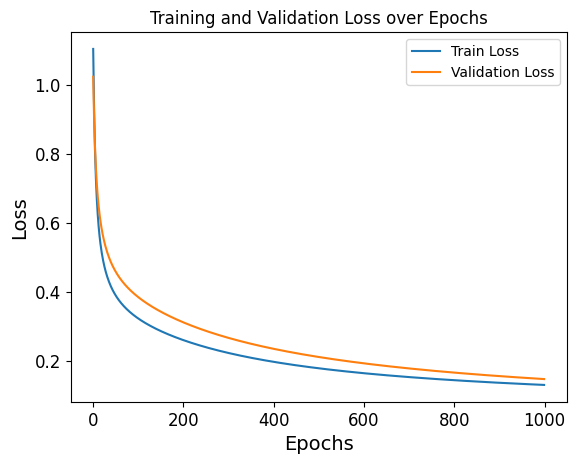

In [89]:
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.show()

Aunque hemos sido restrictivos con la pciencia (5 epochs), vemos que el modelo no alcanzó el Early Stopping, lo que significa que no se alcanza el sobreajuste y podría seguir mejorando con más epochs. En la práctica real, se suele utilizar un rango de mejora mínimo necesario para no activar el Early Stopping, cuando el tiempo de cómputo no compensa la mejoría.

Podemos probar si sucede en un numero mayor de epochs y sin paciencia.

(Se ajustó la comprobación del Early Stopping para exigir mejoras mayores a 1e-5, no afecta al resultado anterior)

Epoch 1: train_loss=1.1054, val_loss=1.0248, train_acc=0.2083, val_acc=0.7667
Epoch 10: train_loss=0.6459, val_loss=0.6947, train_acc=0.8250, val_acc=0.8000
Epoch 20: train_loss=0.5131, val_loss=0.5811, train_acc=0.8417, val_acc=0.8333
Epoch 30: train_loss=0.4532, val_loss=0.5239, train_acc=0.8417, val_acc=0.8333
Epoch 40: train_loss=0.4169, val_loss=0.4872, train_acc=0.8500, val_acc=0.8333
Epoch 50: train_loss=0.3916, val_loss=0.4607, train_acc=0.8583, val_acc=0.8667
Epoch 60: train_loss=0.3725, val_loss=0.4402, train_acc=0.8833, val_acc=0.8667
Epoch 70: train_loss=0.3572, val_loss=0.4234, train_acc=0.8833, val_acc=0.8667
Epoch 80: train_loss=0.3445, val_loss=0.4092, train_acc=0.8833, val_acc=0.9000
Epoch 90: train_loss=0.3335, val_loss=0.3968, train_acc=0.8833, val_acc=0.9333
Epoch 100: train_loss=0.3238, val_loss=0.3859, train_acc=0.8833, val_acc=0.9333
Epoch 110: train_loss=0.3151, val_loss=0.3759, train_acc=0.8917, val_acc=0.9333
Epoch 120: train_loss=0.3072, val_loss=0.3669, trai

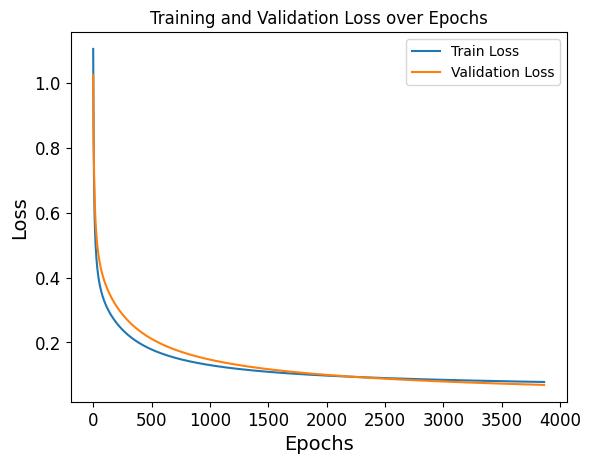

In [90]:
W2_trained, b2_trained, history2 = train_bgd(
    X_train, Y_train,
    X_val, Y_val,
    lr=0.1,
    n_epochs=100000,
    patience=0
)

plt.plot(history2['train_loss'], label='Train Loss')
plt.plot(history2['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.show()

En este caso llega a hacer Early Stoppin

#### 12.5 Evaluación del modelo aprendido.

Evaluamos el modelo final en los conjuntos de entrenamiento y validación usando los datos de la sección 

In [91]:
val_probs_best = softmax(X_val @ W_trained + b_trained)
final_val_loss = cross_entropy(Y_val, val_probs_best)
final_val_acc = accuracy(Y_val, val_probs_best)

print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Validation Loss: 0.1472
Final Validation Accuracy: 0.9667


Probamos a hacer algunas predicciones

In [92]:
sample_indices = np.random.choice(X_val.shape[0], size=5, replace=False)
X_sample = X_val[sample_indices]
y_sample_true = y_val[sample_indices]

y_sample_logits = X_sample @ W_trained + b_trained
y_sample_probs = softmax(y_sample_logits)
y_sample_pred = np.argmax(y_sample_probs, axis=1)  

for i in range(len(sample_indices)):
    print(f"Sample {i+1}: True label: {classes[y_sample_true[i]]}, Predicted label: {classes[y_sample_pred[i]]}")

Sample 1: True label: Iris-virginica, Predicted label: Iris-virginica
Sample 2: True label: Iris-versicolor, Predicted label: Iris-versicolor
Sample 3: True label: Iris-versicolor, Predicted label: Iris-versicolor
Sample 4: True label: Iris-setosa, Predicted label: Iris-setosa
Sample 5: True label: Iris-virginica, Predicted label: Iris-virginica


Se han implementado con éxito Batch Gradient Descent con parada temprana para la Regresión Softmax desde cero utilizando `numpy`. El modelo ha sido capaz de aprender a clasificar las flores del dataset Iris con una precisión alta tanto en el conjunto de entrenamiento como en el de validación, lo que indica que no hay sobreajuste significativo.

Me extraña que no exista overfitting en el segundo caso, dado el pequeño tamaño del dataset. Además, si no hubiera corregido la exigencia mínima de mejora para activar el Early Stopping, el modelo habría seguido entrenando más tiempo. No se si esto es un error en mi implementación o si es normal dada la simplicidad del dataset y el modelo.

En todo caso, el ejercicio ha sido muy útil para entender a fondo cómo funciona la Regresión Softmax y cómo implementar Batch Gradient Descent con parada temprana desde cero.